In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
titanic_df .head (3)

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


<ipython-input-4-6403b48444bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-4-6403b48444bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [5]:
print(' Sex 값 분포 ：\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 ：
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1 ]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [7]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

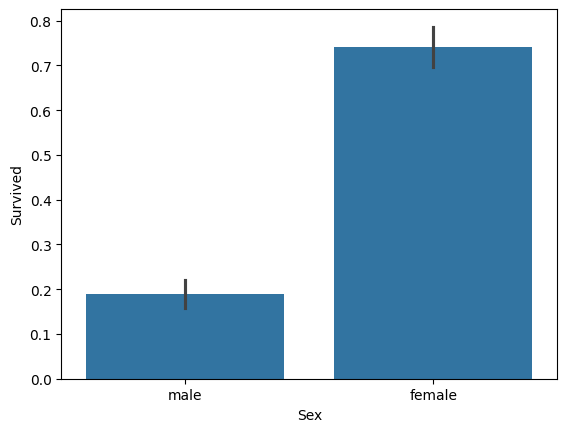

In [8]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

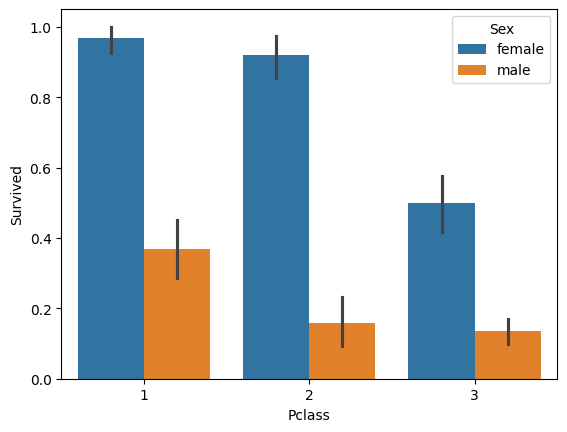

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

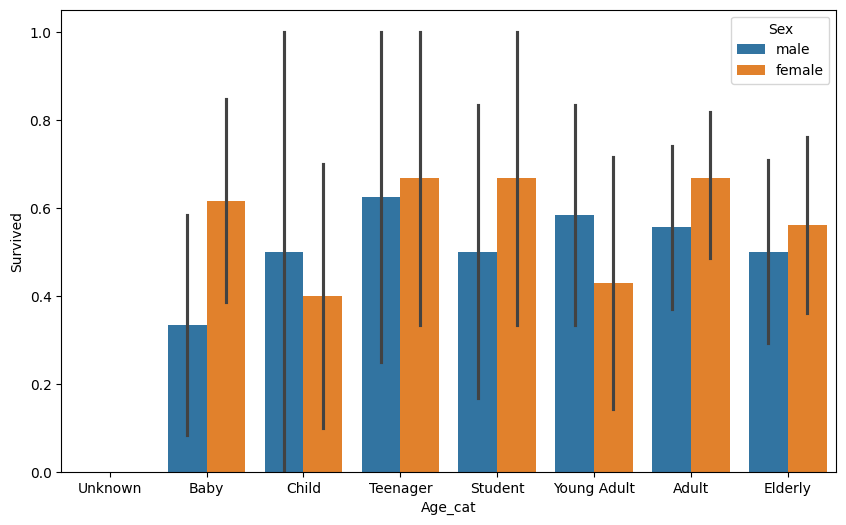

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_category(age):
    if age <= 5:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 25:
        return 'Student'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'


np.random.seed(42)
titanic_df = pd.DataFrame({
    'Age': np.random.randint(0, 80, 200),
    'Sex': np.random.choice(['male', 'female'], 200),
    'Survived': np.random.randint(0, 2, 200)
})

titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)


plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

titanic_df.drop('Age_cat', axis=1, inplace=True)

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        if feature in dataDF.columns:
            le = LabelEncoder()
            dataDF[feature] = le.fit_transform(dataDF[feature].astype(str))

    return dataDF


titanic_df = pd.DataFrame({
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

titanic_df = encode_features(titanic_df)
print(titanic_df.head())

   Sex  Embarked
0    1         2
1    0         0
2    0         1
3    1         2


In [12]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [13]:
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
titanic_df = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
titanic_df .head (3)

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=11)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
IrjDred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-e50cc77edd0f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-12-e50cc77edd0f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8547


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 모델 생성
dt_clf = DecisionTreeClassifier()

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# 실행
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7765
교차 검증 1 정확도: 0.7865
교차 검증 2 정확도: 0.8202
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8315
평균 정확도: 0.8014


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate (scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.8034
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7902


In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [24]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    print("\nConfusion Matrix")
    print(confusion_matrix(y_test, pred))

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.7727
Precision: 0.7111
Recall: 0.5926
F1 Score: 0.6465
ROC AUC: 0.8083

Confusion Matrix
[[87 13]
 [22 32]]


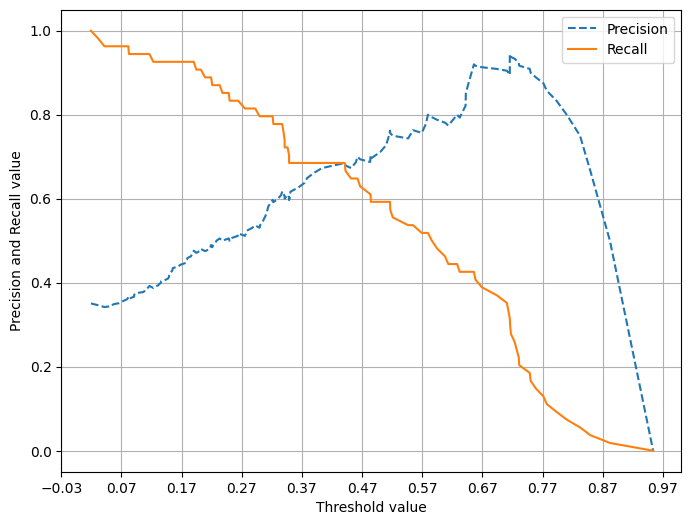

In [34]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1 ]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [35]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


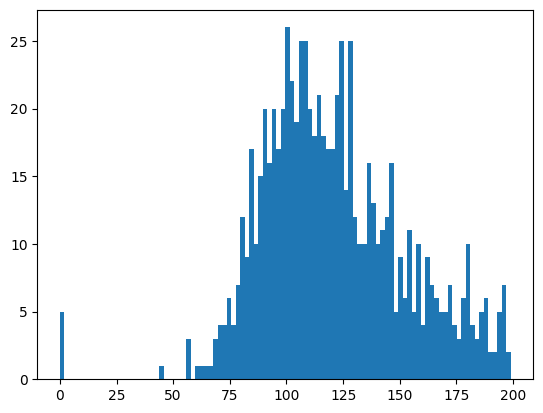

In [37]:
pit.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [44]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,
                                                    100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [49]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [50]:
X = diabetes_data.iloc[:, :-1 ]
y = diabetes_data.iloc[:, -1 ]

scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1 ]

get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.7987
Precision: 0.7674
Recall: 0.6111
F1 Score: 0.6804
ROC AUC: 0.8433

Confusion Matrix
[[90 10]
 [21 33]]


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        pred = (pred_proba_c1 >= threshold).astype(int)
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred)
        recall = recall_score(y_test, pred)
        f1 = f1_score(y_test, pred)

        print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1], thresholds)

Threshold: 0.30, Accuracy: 0.7143, Precision: 0.5658, Recall: 0.7963, F1: 0.6615
Threshold: 0.33, Accuracy: 0.7403, Precision: 0.6000, Recall: 0.7778, F1: 0.6774
Threshold: 0.36, Accuracy: 0.7468, Precision: 0.6190, Recall: 0.7222, F1: 0.6667
Threshold: 0.39, Accuracy: 0.7532, Precision: 0.6333, Recall: 0.7037, F1: 0.6667
Threshold: 0.42, Accuracy: 0.7792, Precision: 0.6923, Recall: 0.6667, F1: 0.6792
Threshold: 0.45, Accuracy: 0.7857, Precision: 0.7059, Recall: 0.6667, F1: 0.6857
Threshold: 0.48, Accuracy: 0.7987, Precision: 0.7447, Recall: 0.6481, F1: 0.6931
Threshold: 0.50, Accuracy: 0.7987, Precision: 0.7674, Recall: 0.6111, F1: 0.6804


In [57]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1 ].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1 ])

Accuracy: 0.7987
Precision: 0.7447
Recall: 0.6481
F1 Score: 0.6931
ROC AUC: 0.8433

Confusion Matrix
[[88 12]
 [19 35]]
